# **Climate Change project**

The aim of this project is to collect and analyse a dataset that can demonstrate change in climate conditions over the last century.
The data used in this project was obtained from https://ourworldindata.org/climate-change



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing csv of monthly average tempertures for different countries between 1950-2020
main_df=pd.read_csv("/content/drive/MyDrive/real_climate_change/monthly-average-surface-temperatures-by-year.csv")

In [4]:
main_df=main_df.drop("Code",axis=1)
copy_df=main_df

In [5]:
#renaming the entity column as country and year as month
main_df.rename(columns={'Entity': 'Country', 'Year': 'Month'}, inplace=True)

In [6]:
#converting various year columns into a single column for year
main_df=main_df.melt(id_vars=["Country", "Month"],
        var_name="Year",
        value_name="Avg_temp")


In [7]:
main_df

,Country,Month,Year,Avg_temp
0,Afghanistan,1,2024,3.300064
1,Afghanistan,2,2024,1.024550
2,Afghanistan,3,2024,5.843506
3,Afghanistan,4,2024,11.627398
4,Afghanistan,5,2024,18.957850
...,...,...,...,...
175495,Zimbabwe,8,1950,16.899963
175496,Zimbabwe,9,1950,21.662418
175497,Zimbabwe,10,1950,23.743795
175498,Zimbabwe,11,1950,24.359114


In [8]:

main_df.isna().sum()

,0
Country,0
Month,0
Year,0
Avg_temp,780


In [9]:
#importing csv containing carbon dioxide(co2)levels for different countries between 1950-2020
co2=pd.read_csv("/content/drive/MyDrive/CLIMATE_CHANGE/co2-long-term-concentration.csv")
co2=co2.drop("Entity",axis=1)
co2=co2.drop("Code",axis=1)
co2.columns=["Year","CO2 concentration"]

In [10]:
#Merging the two dataframes using the pd.merge method
main_df["Year"]=main_df.Year.astype(int)
main_df=pd.merge(main_df,co2,how="left",left_on=["Year"],right_on=["Year"])

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175500 entries, 0 to 175499
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            175500 non-null  object 
 1   Month              175500 non-null  int64  
 2   Year               175500 non-null  int64  
 3   Avg_temp           174720 non-null  float64
 4   CO2 concentration  161460 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.7+ MB


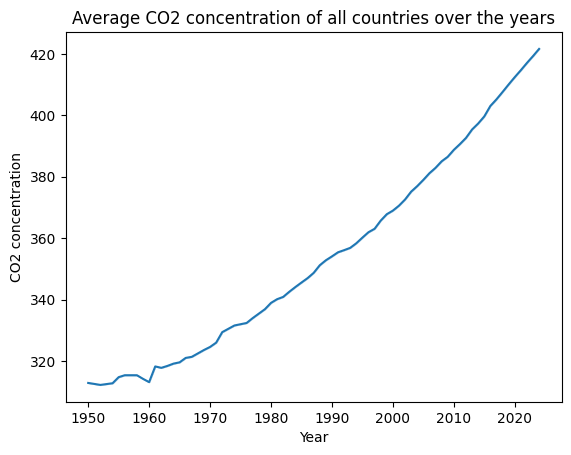

In [12]:
plt.figure()
sns.lineplot(y=main_df["CO2 concentration"],x=main_df["Year"])
plt.title("Average CO2 concentration of all countries over the years")



plt.show()

In [ ]:
#co2 levels have increased almost linearly between 1950-2020

<Axes: >

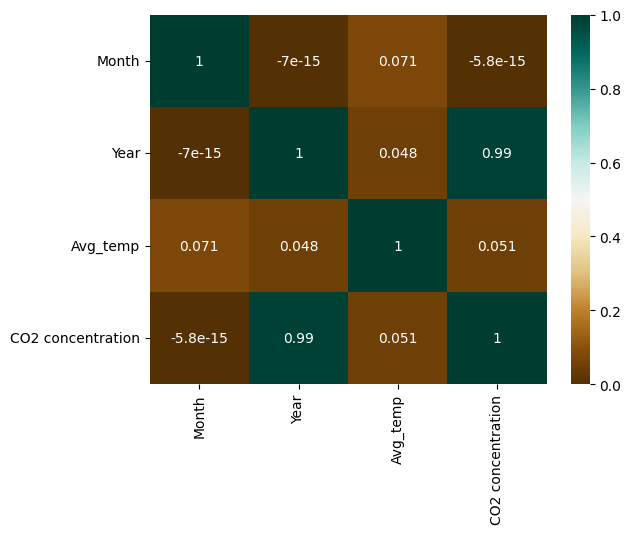

In [13]:
#correlation heatmap demonstrating the relation between various factors in the data
dfn=pd.DataFrame()
for i in main_df.columns:
  if i != "Country":
    dfn[i]=main_df[i]
corr=dfn.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)

In [14]:
#creating a dataframe decdf containing data frame for decade starts  from 1950 to 2020
decdf=pd.DataFrame()
for i in range(1,2050):
  if i == 1950 or i == 1960 or i == 1970 or i == 1980 or i == 1990 or i == 2000 or i == 2010 or i==2020:
    decdf=pd.concat([decdf,main_df[main_df["Year"]==i]],axis=0)

decdf["Year"].value_counts()

,count
Year,
1950,2340
1960,2340
1970,2340
1980,2340
1990,2340
2000,2340
2010,2340
2020,2340


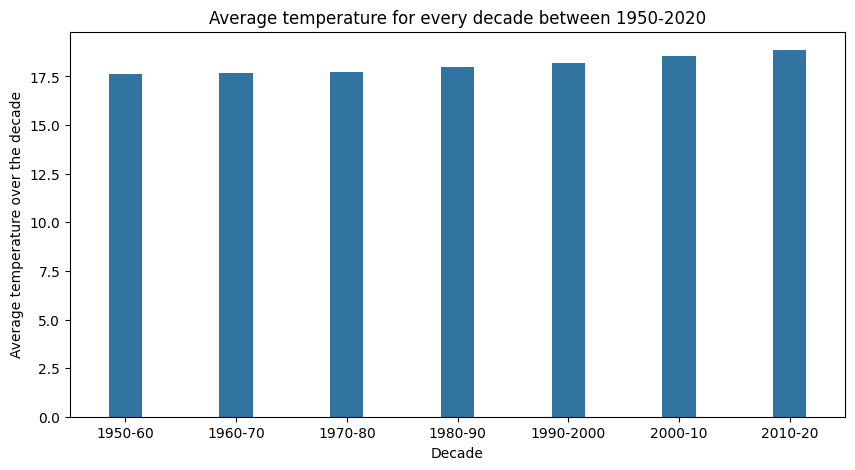

In [15]:
dec1=(main_df[(main_df["Year"]<=1960)&(main_df["Year"]>=1950)]["Avg_temp"]).mean()
dec2=(main_df[(main_df["Year"]<=1970)&(main_df["Year"]>=1960)]["Avg_temp"]).mean()
dec3=(main_df[(main_df["Year"]<=1980)&(main_df["Year"]>=1970)]["Avg_temp"]).mean()
dec4=(main_df[(main_df["Year"]<=1990)&(main_df["Year"]>=1980)]["Avg_temp"]).mean()
dec5=(main_df[(main_df["Year"]<=2000)&(main_df["Year"]>=1990)]["Avg_temp"]).mean()
dec6=(main_df[(main_df["Year"]<=2010)&(main_df["Year"]>=2000)]["Avg_temp"]).mean()
dec7=(main_df[(main_df["Year"]<=2020)&(main_df["Year"]>=2010)]["Avg_temp"]).mean()
plt.figure(figsize=(10,5))
sns.barplot(x=["1950-60","1960-70","1970-80","1980-90","1990-2000","2000-10","2010-20"],y=[dec1,dec2,dec3,dec4,dec5,dec6,dec7],width=0.3)
plt.ylabel("Average temperature over the decade")
plt.xlabel("Decade")
plt.title("Average temperature for every decade between 1950-2020")
plt.show()

In [ ]:
#The average temperatures since 1950 have increased steadily

In [16]:
print(f"The average temperature of the planet for the decade of 1950-1960 was {round(dec1,1)} degrees celsius and for the decade of 2010-2020 it was {round(dec7,1)} degrees celsius which\nindicates an increase of {round((dec7 - dec1),1)} degrees in the average temperature  over the 70 year period.")

The average temperature of the planet for the decade of 1950-1960 was 17.6 degrees celsius and for the decade of 2010-2020 it was 18.9 degrees celsius which
indicates an increase of 1.2 degrees in the average temperature  over the 70 year period.


In [17]:
main_df

,Country,Month,Year,Avg_temp,CO2 concentration
0,Afghanistan,1,2024,3.300064,421.64530
1,Afghanistan,2,2024,1.024550,421.64530
2,Afghanistan,3,2024,5.843506,421.64530
3,Afghanistan,4,2024,11.627398,421.64530
4,Afghanistan,5,2024,18.957850,421.64530
...,...,...,...,...,...
175495,Zimbabwe,8,1950,16.899963,312.83102
175496,Zimbabwe,9,1950,21.662418,312.83102
175497,Zimbabwe,10,1950,23.743795,312.83102
175498,Zimbabwe,11,1950,24.359114,312.83102


In [18]:
tempdif=[]
for country in main_df["Country"].unique():
  tempdif.append(((((main_df[(main_df["Country"]==country)& (main_df["Year"]==2020)]["Avg_temp"]).mean())-((main_df[(main_df["Country"]==country) &(main_df["Year"]==1950)]["Avg_temp"]).mean()))))



In [19]:
tdf=pd.DataFrame()
tdf["Country"]=main_df["Country"].unique()
tdf["Temperature difference"]=tempdif

In [20]:
tdf.sort_values(by="Temperature difference",ascending=False,inplace=True)
tdf

,Country,Temperature difference
50,Djibouti,3.904299
146,Russia,3.734178
132,Norway,3.383854
57,Eritrea,3.350020
152,Saudi Arabia,3.255755
...,...,...
188,Vanuatu,0.386255
1,Albania,0.263531
186,Uruguay,0.263446
82,Hungary,0.072514


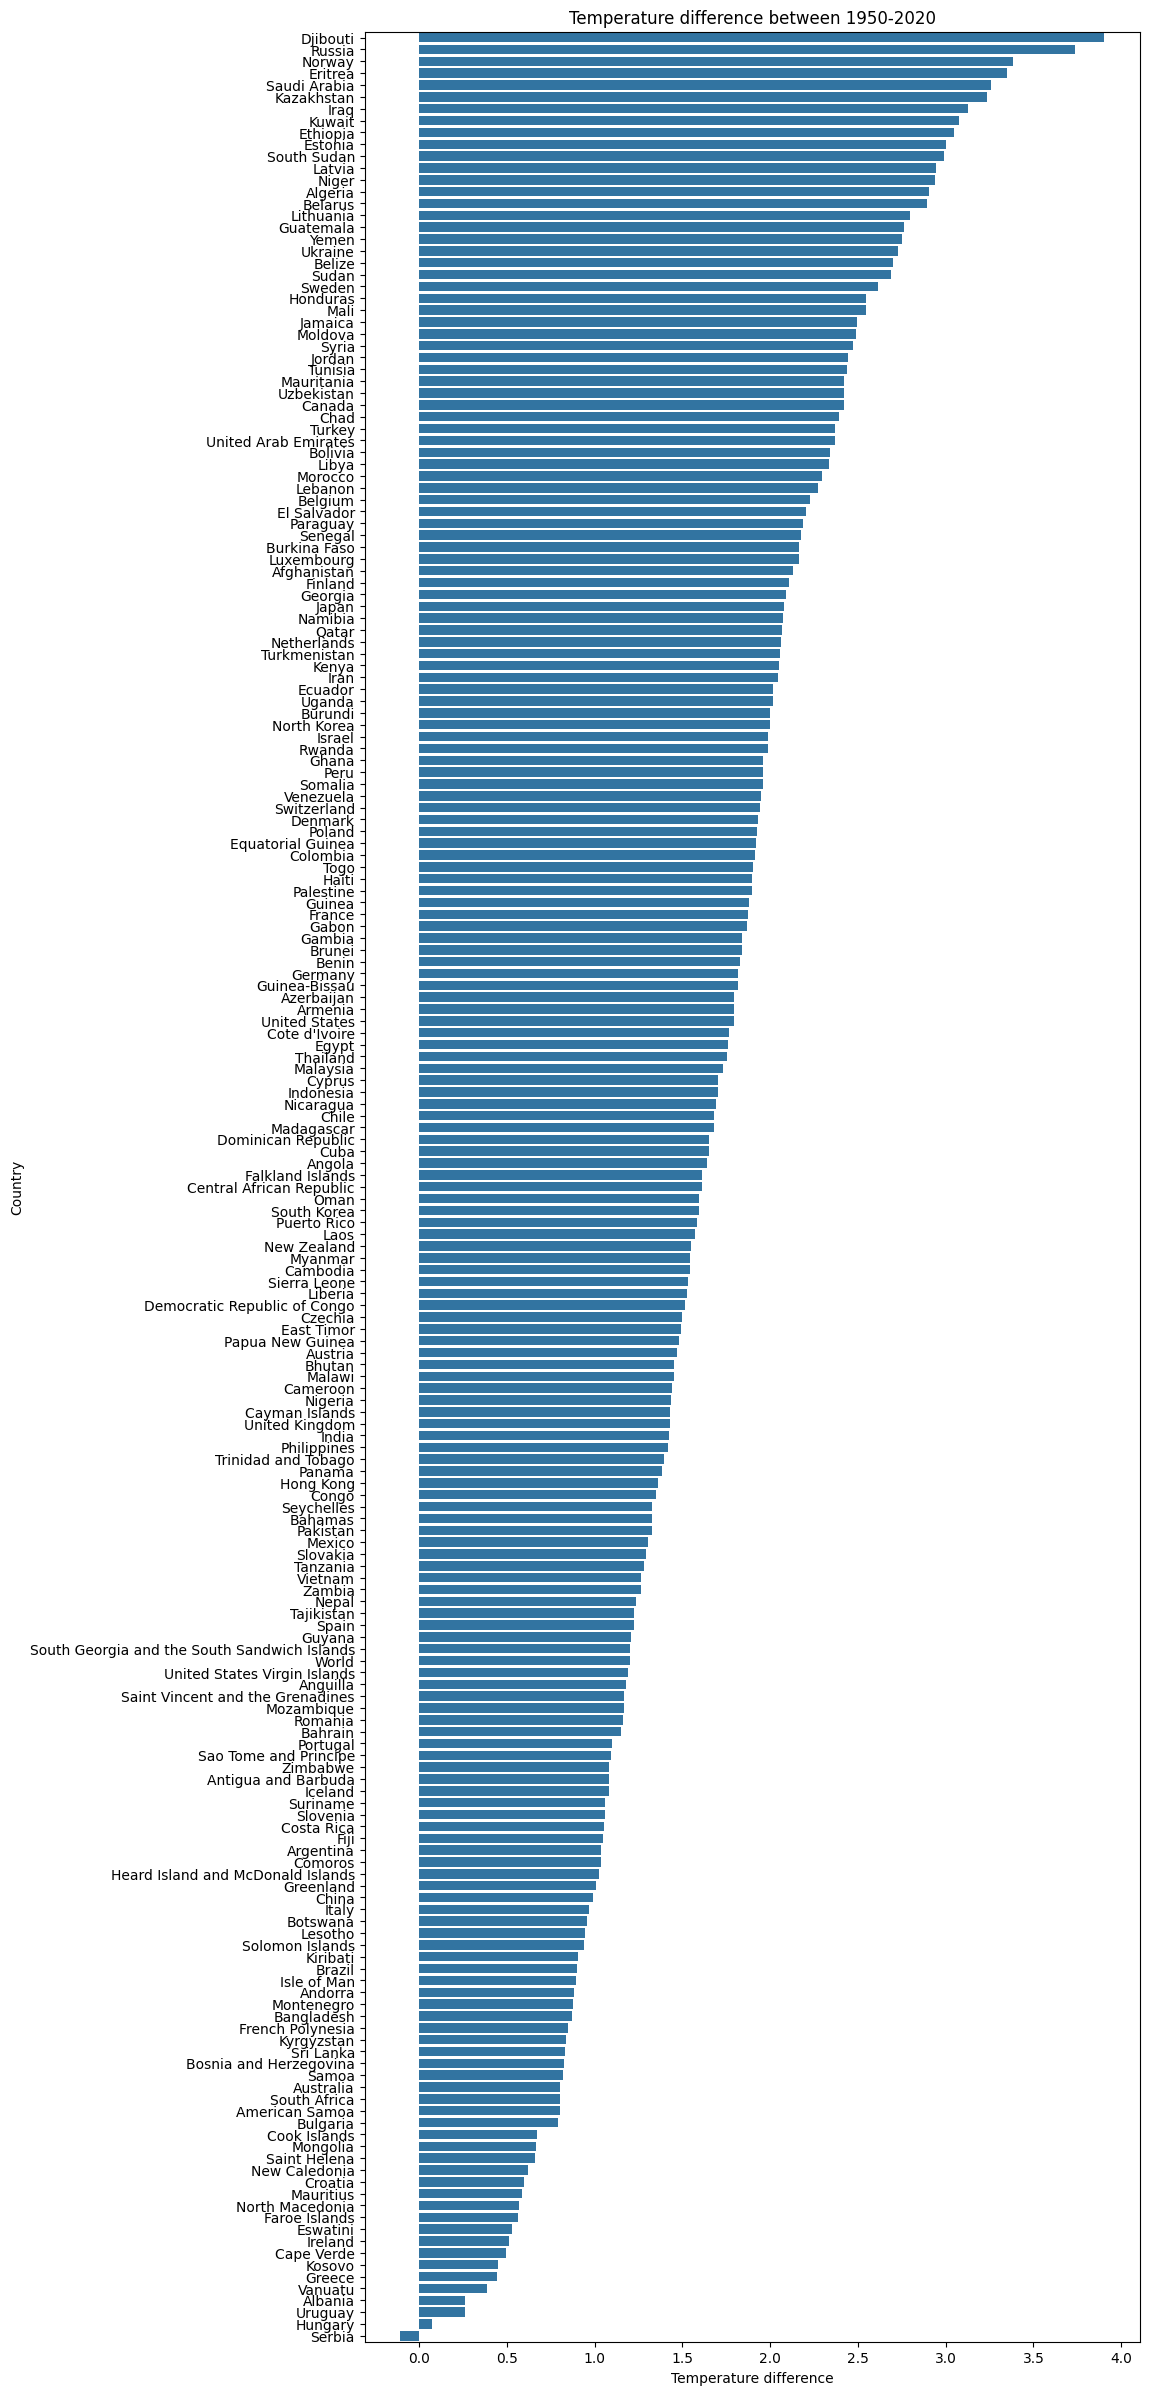

In [21]:
plt.figure(figsize=(10,30))
sns.barplot(x=tdf["Temperature difference"],y=tdf["Country"])
plt.xlabel("Temperature difference")
plt.ylabel("Country")
plt.title("Temperature difference between 1950-2020")
plt.show()



In [22]:
#All countries except serbia have shown an increase in average yearly temperature since 1950
#Djbouti and Russia have shown the highest increase in average yearly temperature since 1950


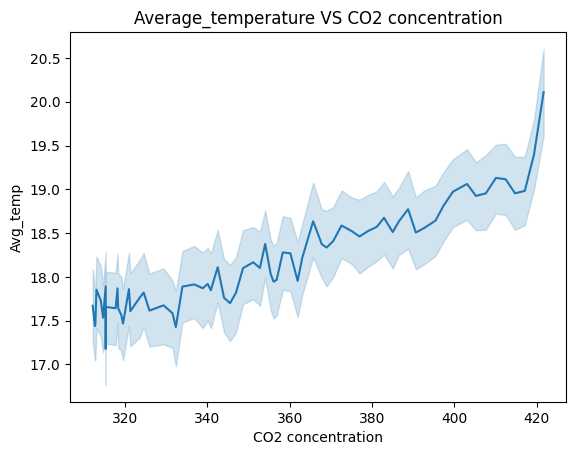

In [23]:
plt.figure()
sns.lineplot(y=main_df["Avg_temp"],x=main_df["CO2 concentration"])
plt.title("Average_temperature VS CO2 concentration")
plt.show()

In [24]:
#Theabove plot shows a direct relation between average temperature and CO2 concentration
#Higher CO2 concentrations lead to higher temperatures

In [25]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175500 entries, 0 to 175499
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            175500 non-null  object 
 1   Month              175500 non-null  int64  
 2   Year               175500 non-null  int64  
 3   Avg_temp           174720 non-null  float64
 4   CO2 concentration  161460 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.7+ MB


In [26]:
main_df["Month"]=main_df["Month"].astype("category").cat.as_ordered()

In [27]:
mtempdif=[]
for month in main_df["Month"].unique():
  mtempdif.append(((main_df[(main_df["Year"]==2020)&(main_df["Month"]==month)]["Avg_temp"]).mean())-((main_df[(main_df["Year"]==1950)&(main_df["Month"]==month)]["Avg_temp"]).mean()))


In [28]:
mtempdif

[2.660362776948718,
 2.5378133075384604,
 1.7903338683794843,
 1.4956117754461502,
 1.3100553012820555,
 1.318787330923076,
 1.0512773689435946,
 1.5441231929230845,
 1.3825857250256455,
 1.584558938933334,
 1.6192748719999965,
 1.605428924471795]

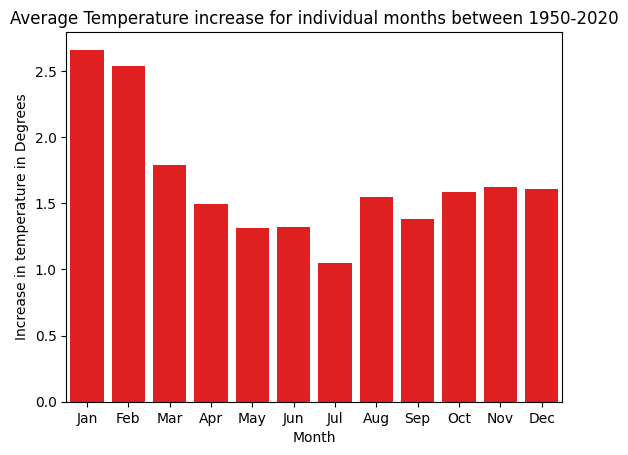

In [29]:
plt.figure()
sns.barplot(x=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],y=mtempdif,color="red")
plt.ylabel("Increase in temperature in Degrees")
plt.xlabel("Month")
plt.title("Average Temperature increase for individual months between 1950-2020")
plt.show()

In [30]:
#From the above figure its clear that:-
#The average temperature has increased for all the months.
#The summers have gotten hotter and the winters less cooler.
# The month of january has had the highest increase in average temperature between 1950-2020.
#The month of july has had the least increase in avreage temperature between 1950-2020

In [32]:
ddf=[]
for year1,year2 in [(1950,1960),(1960,1970),(1970,1980),(1980,1990),(1990,2000),(2000,2010),(2010,2020)]:
  ddf.append((main_df[main_df["Year"]==year2]["Avg_temp"].mean())-(main_df[main_df["Year"]==year1]["Avg_temp"].mean()))



<ipython-input-52-1ddf572ca09f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["1950-1960","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"],y=ddf,palette=["red","blue","red","red","blue","red","red"])


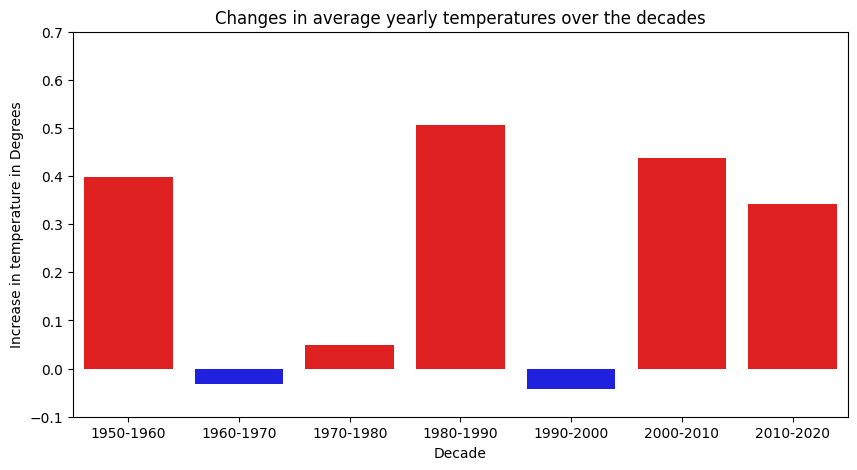

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=["1950-1960","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"],y=ddf,palette=["red","blue","red","red","blue","red","red"])
plt.ylim(-0.1,0.7)
plt.ylabel("Increase in temperature in Degrees")
plt.xlabel("Decade")
plt.title("Changes in average yearly temperatures over the decades")
plt.show();

In [ ]:
#from the above plot we can conclude
#The decade of 1980-1990 had the highest increase in the average temperature
#The deades of 1960-1970 and 1990-2000 had a slight decrease in the average temperature


# **Final conclusions and summary**

1).Co2 levels have increased almost linearly between 1950-2020.

2).The average temperatures since 1950 have increased steadily.

3).All countries except serbia have shown an increase in average yearly temperature since 1950.

4).Djbouti and Russia have shown the highest increase in average yearly temperature since .

5).The above plot shows a direct relation between average temperature and CO2 concentration.

6).Higher CO2 concentrations lead to higher temperatures.

7).The average temperature has increased for all the months.

8).The summers have gotten hotter and the winters less cooler.

9). The month of january has had the highest increase in average temperature between 1950-2020.

10).The month of july has had the least increase in avreage temperature between 1950-2020.

11)The decade of 1980-1990 had the highest increase in the average temperature.

12)The deades of 1960-1970 and 1990-2000 had a slight decrease in the average temperature.


